In [56]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

In [58]:
#Reading data
sp500_df = pd.read_csv("./data/SP500_Data.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
gold_df = pd.read_csv("./data/gold_data.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
btc_df = pd.read_csv("./data/BTCUSDT.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
btc_df.head()


,Open,High,Low,Close,Volume,Dividends
Date,,,,,,
2017-09-01,4689.89,4885.55,4654.88,4834.91,560.666366,0
2017-09-02,4796.16,4939.19,4286.87,4472.14,929.148595,0
2017-09-03,4508.50,4714.76,4298.33,4509.08,691.216198,0
2017-09-04,4505.00,4527.49,3972.51,4100.11,1394.644614,0
2017-09-05,4106.97,4484.99,3603.00,4366.47,1228.938157,0


In [59]:
#drop columns
sp500 = sp500_df.drop(["Open", "High", "Low", "Volume", "Dividends"], axis=1)
gold = gold_df.drop(["Open", "High", "Low", "Volume", "Open Interest"], axis=1)
btc = btc_df.drop(["Open", "High", "Low", "Volume", "Dividends"], axis=1)
btc.head()

,Close
Date,
2017-09-01,4834.91
2017-09-02,4472.14
2017-09-03,4509.08
2017-09-04,4100.11
2017-09-05,4366.47


In [60]:
# combine data:
sp500_gold_btc = pd.concat([sp500, gold, btc], axis = "columns", join = "inner")
sp500_gold_btc.columns = ["SP500", "Gold", "BTC"]
sp500_gold_btc.head()


,SP500,Gold,BTC
Date,,,
2017-09-01,2476.550049,1330.4,4834.91
2017-09-05,2457.850098,1344.5,4366.47
2017-09-06,2465.540039,1339.0,4619.77
2017-09-07,2465.100098,1350.3,4691.61
2017-09-08,2461.429932,1351.2,4282.80


In [66]:
#clean data
sp500_gold_btc = sp500_gold_btc.dropna().copy()
sp500_gold_btc = sp500_gold_btc.sort_values("Date", ascending=True)
sp500_gold_btc.head()

,SP500,Gold,BTC
Date,,,
2017-09-01,2476.550049,1330.4,4834.91
2017-09-05,2457.850098,1344.5,4366.47
2017-09-06,2465.540039,1339.0,4619.77
2017-09-07,2465.100098,1350.3,4691.61
2017-09-08,2461.429932,1351.2,4282.80


<AxesSubplot:xlabel='Date'>

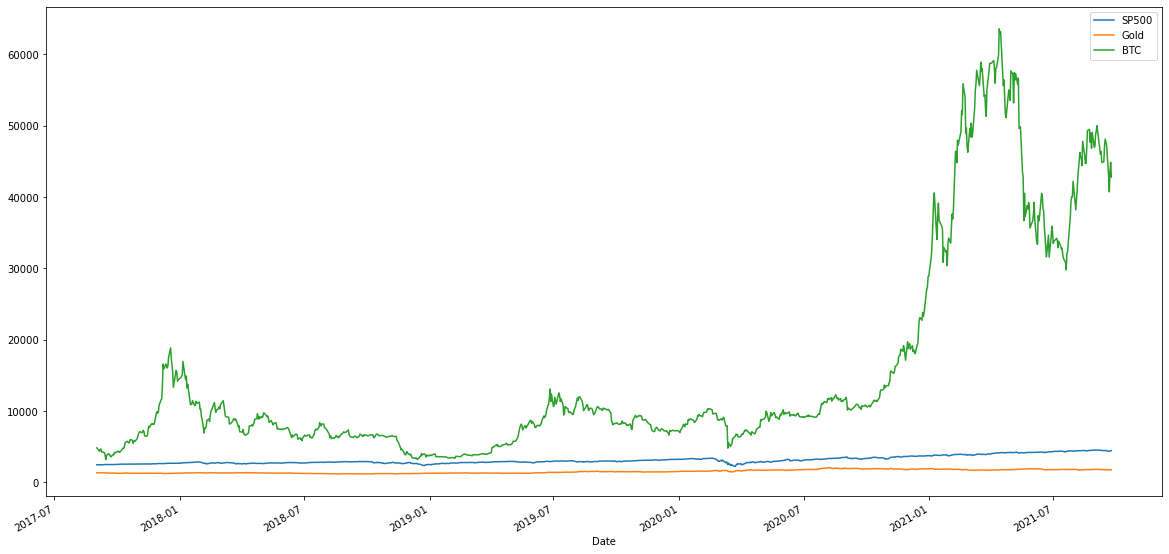

In [71]:
sp500_gold_btc.plot(figsize=(20,10))

In [64]:
# daily return
daily_return = sp500_gold_btc.pct_change().dropna()
daily_return.head()

,SP500,Gold,BTC
Date,,,
2017-09-05,-0.007551,0.010598,-0.096887
2017-09-06,0.003129,-0.004091,0.058010
2017-09-07,-0.000178,0.008439,0.015551
2017-09-08,-0.001489,0.000667,-0.087136
2017-09-11,0.010839,-0.011471,-0.017355


<AxesSubplot:>

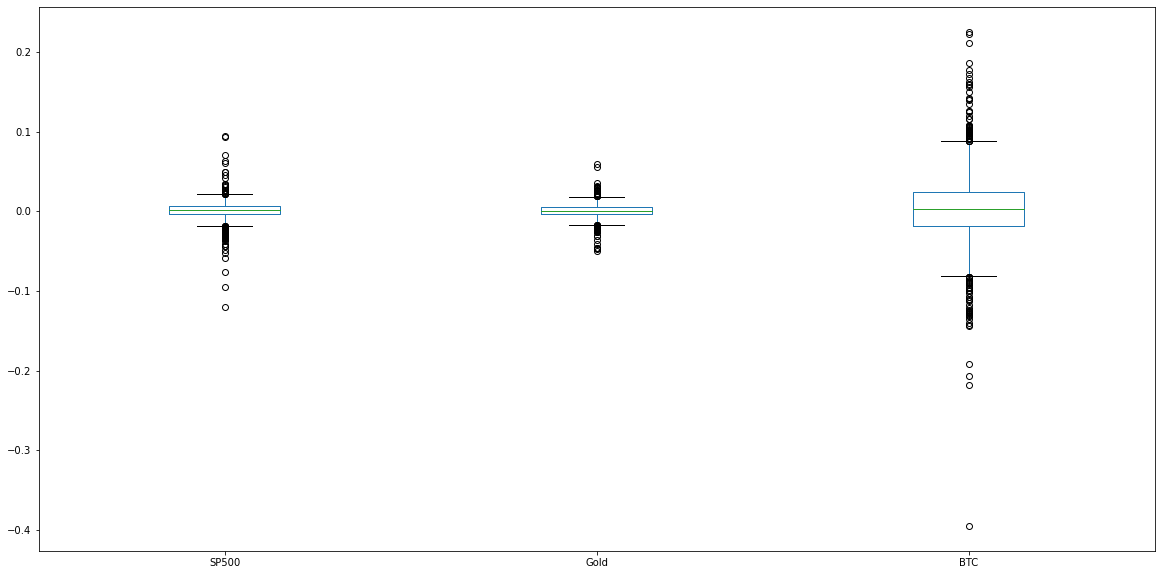

In [79]:
daily_return.plot.box(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

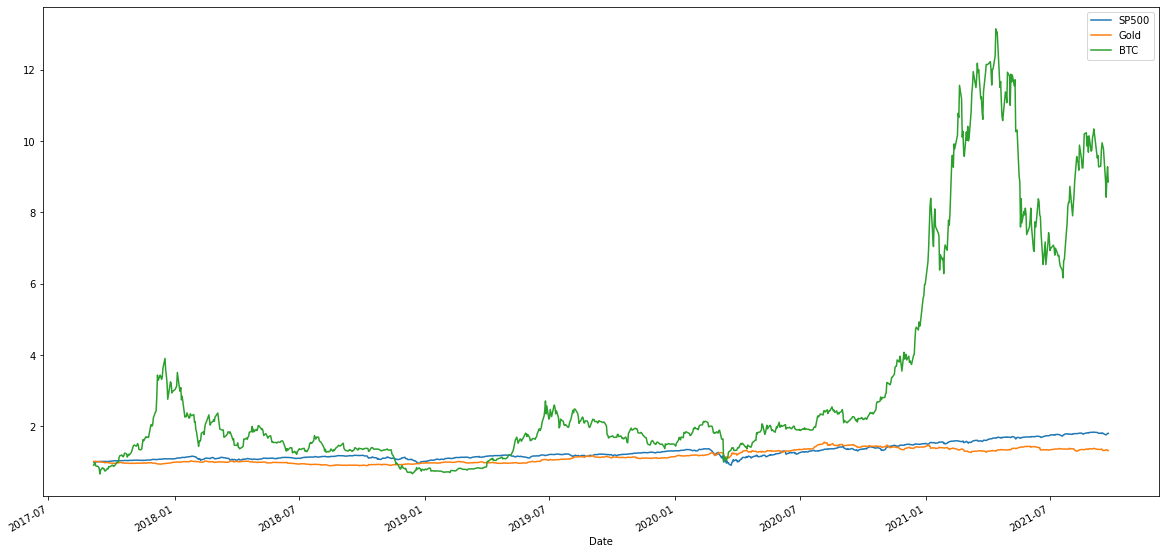

In [76]:
#Cumulative return:
cumulative_returns = (1 + daily_return).cumprod()
cumulative_returns.plot(figsize=(20,10))

In [81]:
# Standard:
daily_std = daily_return.std()
daily_std

SP500    0.013119
Gold     0.009681
BTC      0.050514
dtype: float64

In [83]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_return = daily_return.std()*np.sqrt(252)
annual_std_return

SP500    0.208254
Gold     0.153679
BTC      0.801882
dtype: float64

In [86]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_return.rolling(window=21).std()


,SP500,Gold,BTC
Date,,,
2017-09-05,NaN,NaN,NaN
2017-09-06,NaN,NaN,NaN
2017-09-07,NaN,NaN,NaN
2017-09-08,NaN,NaN,NaN
2017-09-11,NaN,NaN,NaN
...,...,...,...
2021-09-20,0.006553,0.009046,0.038092
2021-09-21,0.006246,0.009240,0.037130
2021-09-22,0.006325,0.008779,0.040752


<AxesSubplot:xlabel='Date'>

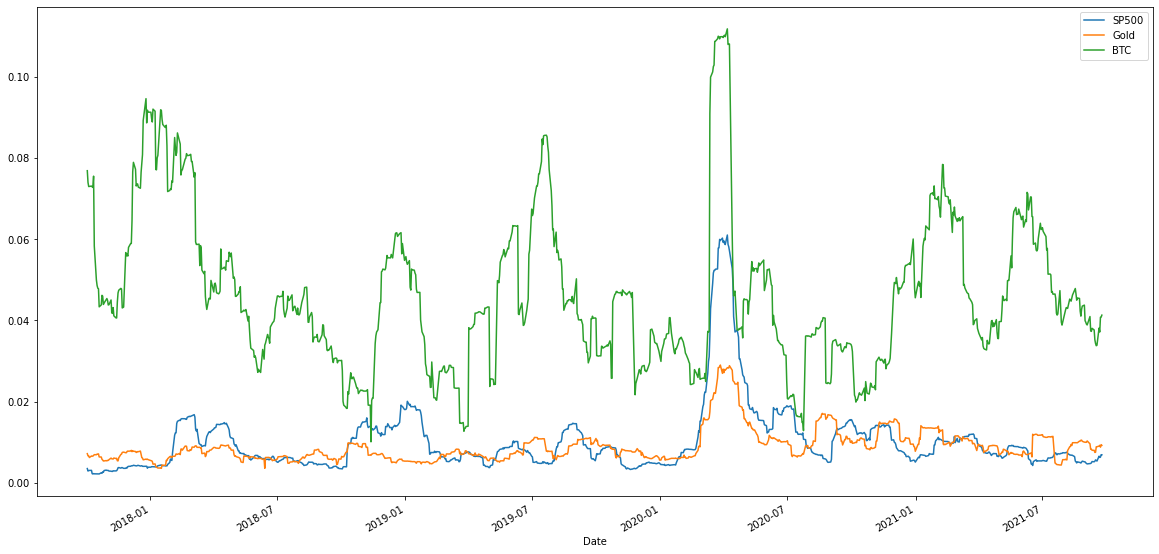

In [88]:

# Plot the rolling standard deviation
daily_return.rolling(window=21).std().plot(figsize=(20,10))